<a href="https://colab.research.google.com/gist/qbeer/a7b26bcbc56a63f32097e52738f57a76/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#Exploratory-data-analysis" class="anchor-link">¶</a>
========================================================================================================================================================

<http://patbaa.web.elte.hu/physdm/data/titanic.csv>

On the link above you will find a dataset about the Titanic passengers.
Your task is to explore the dataset.

Help for the columns:

-   SibSp - number of sibling/spouses on the ship
-   Parch - number of parent/children on the ship
-   Cabin - the cabin they slept in (if they had a cabin)
-   Embarked - harbour of entering the ship
-   Pclass - passenger class (like on trains)

### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#1.-Load-the-above-linked-csv-file-as-a-pandas-dataframe.-Check-&amp;-plot-if-any-of-the-columns-has-missing-values.-If-they-have,-investigate-if-the-missingness-is-random-or-not." class="anchor-link">¶</a>

Impute the missing values in a sensible way:

-   if only a very small percentage is missing, imputing with the
    column-wise mean makes sense, or also removing the missing rows
    makes sense
-   if in a row almost all the entries is missing, it worth to remove
    that given row
-   if a larger portion is missing from a column, usually it worth to
    encode that with a value that does not appear in the dataset (eg:
    -1).

The imputing method affects different machine learning models different
way, but now we are interested only in EDA, so try to keep as much
information as possible!

### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#2.-Create-a-heatmap-which-shows-how-many-people-survived-and-dies-with-the-different-Pclass-variables.-You-need-to-create-a-table-where-the-columns-indicates-if-a-person-survived-or-not,-the-rows-indicates-the-different-Pclass-and-the-cell-values-contains-the-number-of-people-belonging-the-that-given-category.-The-table-should-be-colored-based-on-the-value-of-the-cells-in-the-table." class="anchor-link">¶</a>

### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#3.-Create-boxplots-for-each-different-Pclass.-The-boxplot-should-show-the-age-distribution-for-the-given-Pclass.-Plot-all-of-these-next-to-each-other-in-a-row-to-make-it-easier-to-compare!" class="anchor-link">¶</a>

### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#4.-Calculate-the-correlation-matrix-for-the-numerical-columns.-Show-it-also-as-a-heatmap-described-at-the-1st-task." class="anchor-link">¶</a>

Which feature seems to play the most important role in surviving/not
surviving? Explain how and why could that feature be important!

### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#5.-Create-two-plots-which-you-think-are-meaningful.-Interpret-both-of-them.-(Eg.:-older-people-buy-more-expensive-ticket?-people-buying-more-expensive-ticket-survive-more?-etc.)" class="anchor-link">¶</a>

### Hints:<a href="http://patbaa.web.elte.hu/physdm/code_examples/01_SOLVED_EDA.html#Hints:" class="anchor-link">¶</a>

-   On total you can get 10 points for fully completing all tasks.
-   Decorate your notebook with, questions, explanation etc, make it
    self contained and understandable!
-   Comments you code when necessary
-   Write functions for repetitive tasks!
-   Use the pandas package for data loading and handling
-   Use matplotlib and seaborn for plotting or bokeh and plotly for
    interactive investigation
-   Use the scikit learn package for almost everything
-   Use for loops only if it is really necessary!
-   Code sharing is not allowed between student! Sharing code will
    result in zero points.
-   If you use code found on web, it is OK, but, make its source clear!



In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [30]:
import pandas as pd
import seaborn as sns

In [29]:
titanic_df = pd.read_csv("titanic.csv") #importation of the data
titanic_df.head()  # printing out the fisrt couple lines

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


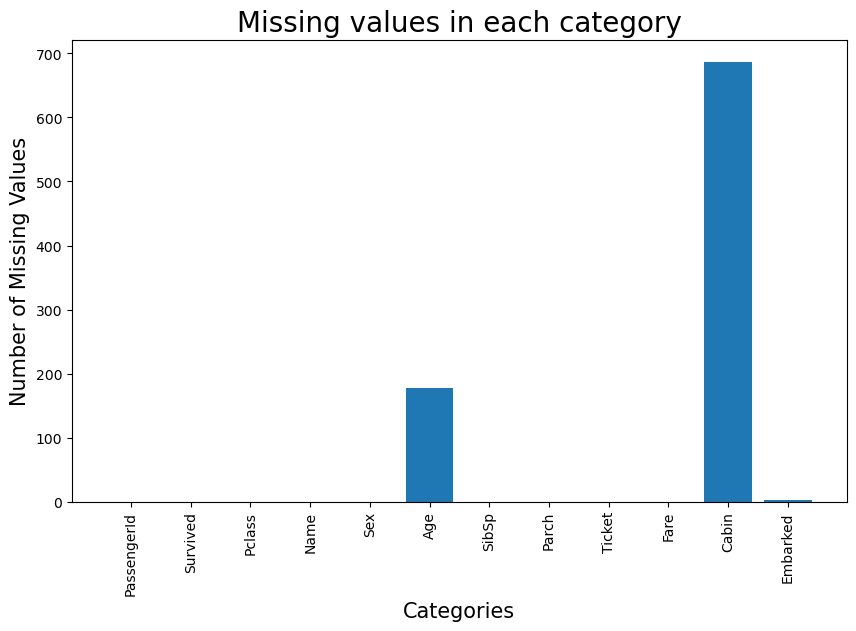

In [17]:
missing_vals = titanic_df.isnull()  # i used pandas built in function to search for nan values
num_of_missing_vals = missing_vals.sum()


figure(figsize=(10, 6))
bar(num_of_missing_vals.index, num_of_missing_vals.values)
xlabel('Categories', size = 15)
ylabel('Number of Missing Values', size = 15)
title('Missing values in each category', size = 20)
plt.xticks(rotation=90)
plt.show()

I would think if the missingness of these data were random it would be more evenly distributed amongst the columns, than we can see in this plot.

Now i am going to handle the missing data as told above. If only a small percentage is missing it would be wise to impute the column-wise mean, but in this case this column contains letters, so i am going to reaplace it with the most frequent one.

In [24]:
most_frequent_element = titanic_df["Embarked"].mode().values[0] #using the mode function
print("The most frequent element is",most_fequent_element)

The most frequent element is S


In [25]:
titanic_df['Embarked'].fillna(most_frequent_element, inplace=True)

In [26]:
#if a larger portion of a column is nan i replace it with a value which not appears in the dataset
titanic_df['Cabin'].fillna(-1,inplace = True)

### 2.task

In [39]:
pivot_table = titanic_df.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count', fill_value=0)
#to solve this problem where i created a pivot table where i used the values of pclass as index, 
# then i counted how many passenger falls into this group for each index (pclass)

In [40]:
pivot_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


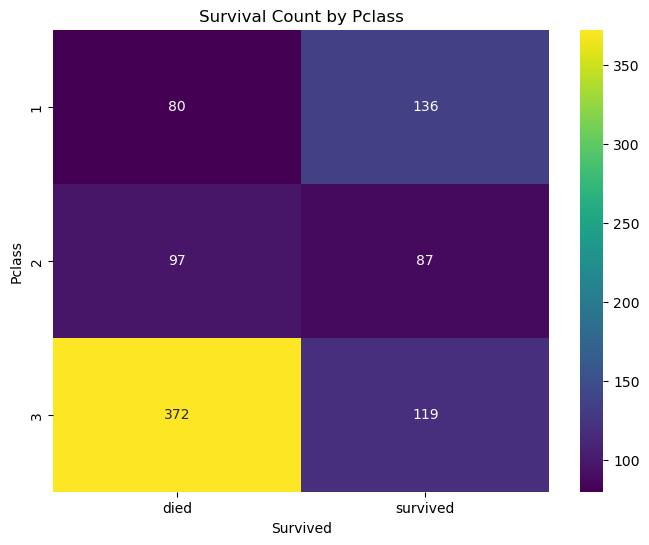

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Survival count by pclass')
plt.xticks([0.5,1.5],["died","survived"])
plt.show()

### Task 3

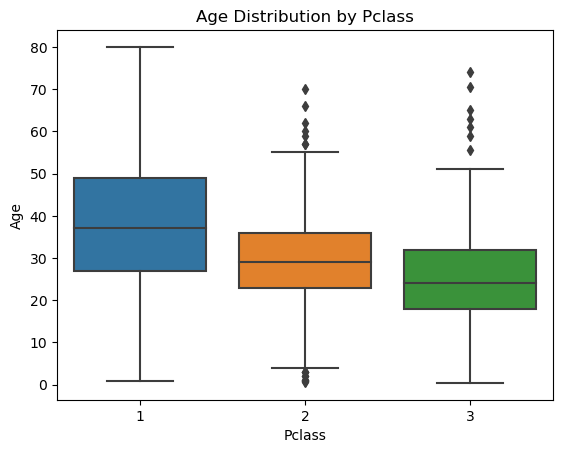

In [47]:
sns.boxplot(x='Pclass', y = 'Age', data=titanic_df) 
plt.title('Age Distribution by Pclass')
plt.show()

### Task 4

In [51]:
needed_columns = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
new_data = titanic_df[needed_columns] #created a new table which only contains numerical values
correlation_matrix = new_data.corr()

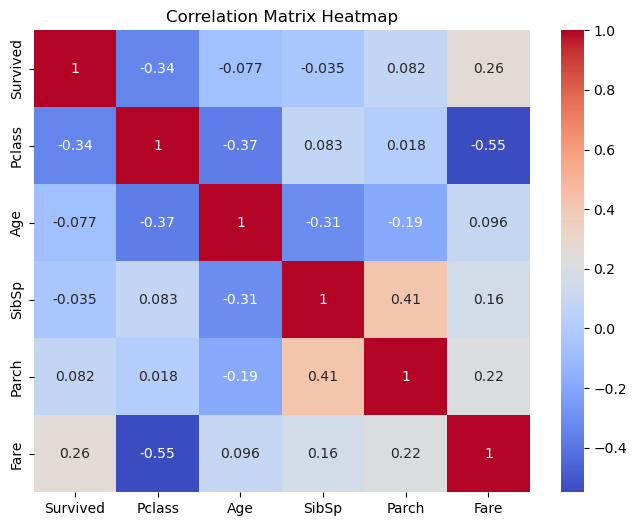

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


Pclass has the highest absolute correlation with surviving so that was the most important feature. This seems logical, beacuse rich passenger could buy their seats in the lifeboats.

### Task 5

C:\Users\boton\AppData\Local\Temp\ipykernel_16104\3462277600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotdata.loc[:,'Fare Category'] = pd.cut(plotdata['Fare'], bins=fare_bins, labels=fare_labels)


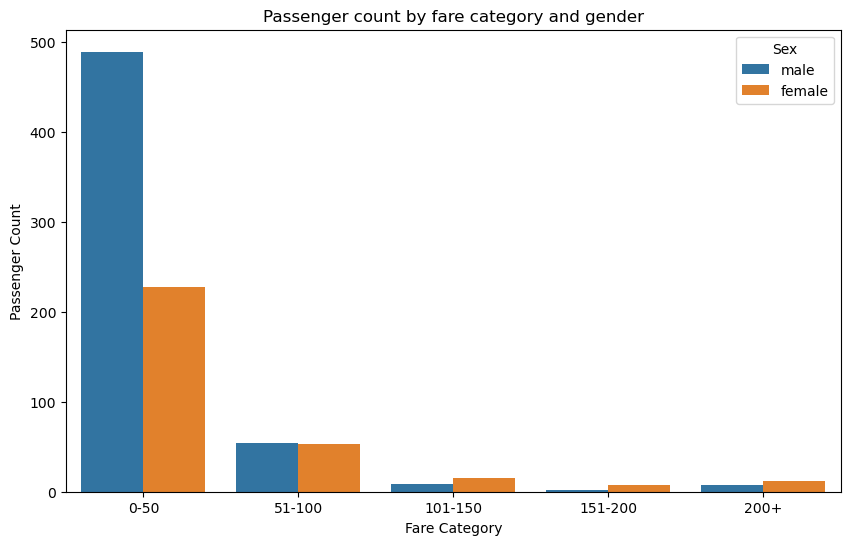

In [69]:
plotdata = titanic_df[["Sex","Fare"]]
fare_bins = [0, 50, 100, 150, 200, float('inf')]
fare_labels = ['0-50', '51-100', '101-150', '151-200', '200+']
plotdata.loc[:,'Fare Category'] = pd.cut(plotdata['Fare'], bins=fare_bins, labels=fare_labels)
plt.figure(figsize=(10, 6))
sns.countplot(data=plotdata, x='Fare Category', hue='Sex')
plt.title('Passenger count by fare category and gender')
plt.xlabel('Fare Category')
plt.ylabel('Passenger Count')
plt.show()


I thinks it is exciting to see, that there were more females in the higher priced categories.

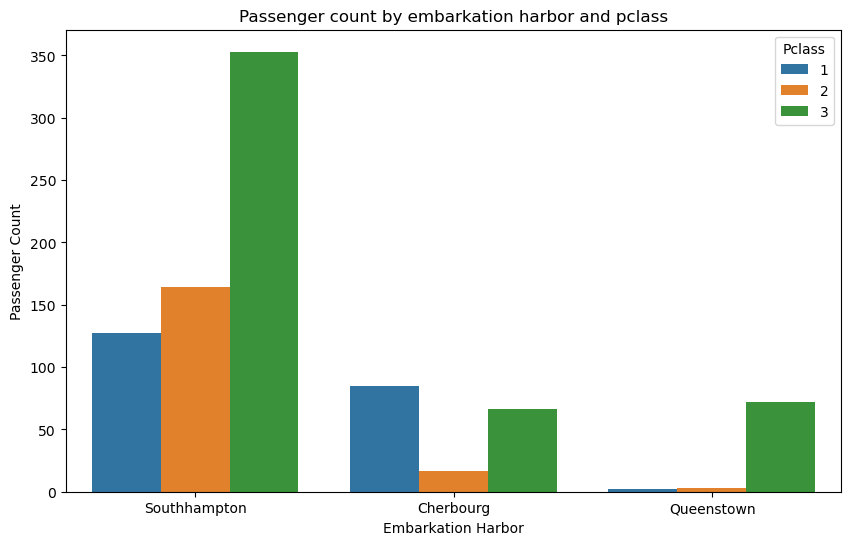

In [84]:
plotdata2 = titanic_df[["Pclass","Embarked"]]
plt.figure(figsize=(10, 6))
sns.countplot(data=plotdata2, x='Embarked', hue='Pclass')
plt.title('Passenger count by embarkation harbor and pclass')
plt.xlabel('Embarkation Harbor')
plt.xticks([0.0015,1.0015,2.0015],["Southhampton","Cherbourg","Queenstown"])
plt.ylabel('Passenger Count')
plt.show()

France is the only place where the number of new first class passengers exceeded the other two categories. 

![route of titanic](route.png)